### Introduction:
The purpose of this project is to analyze the stock price data of ___`Bharat Petroleum Corporation Limited (BPCL)`___ using Python. The data will be retrieved from data.nasdaq.com API and plotted using a plotting library such as Matplotlib or Seaborn.

#### Technology Requirements:

The Jupyter Notebook should be written in Python programming language.
The stock price data should be retrieved using **`data.nasdaq.com API.`**
The line graph should be generated using a plotting library such as Matplotlib or Seaborn.

#### Deliverables:

A completed Jupyter Notebook that meets the technology requirements outlined above.
A brief summary of the findings and observations from the analysis of BPCL stock price data.
All source code and supporting documentation necessary to run the Jupyter Notebook on a computer with Python and the required libraries installed.
Instructions for Running the Jupyter Notebook:

Install the latest version of Python on your computer.
Install the required libraries for the project, including Jupyter Notebook, Matplotlib or Seaborn, and any other libraries required for API data retrieval.
Download the project files from the source provided.
Open the Jupyter Notebook file and run the cells one by one.
The line graph of BPCL stock price data will be generated and displayed in the Notebook.
Expected Outcome:
After following the instructions above and running the Jupyter Notebook, a line graph of BPCL stock price data will be generated and displayed. The graph will show the trend of BPCL stock prices over time and provide insights into the stock performance.

#### Conclusion:
___The project is a comprehensive analysis of BPCL stock price data using Python programming language, data.nasdaq.com API, and a plotting library such as Matplotlib or Seaborn. The deliverables of the project include a completed Jupyter Notebook, a brief summary of the findings, and all the source code and supporting documentation necessary to run the Notebook. By following the instructions and running the Notebook, you can generate a line graph of BPCL stock price data and gain valuable insights into the stock performance.___

In [1]:
import quandl 
import pandas as pd 
from matplotlib import pyplot as plt , dates as mdates
from datetime import datetime
import seaborn as sns 
from dateutil.relativedelta import relativedelta
# from scipy.stats import zscore
import config
import numpy as np
# pandas.set_option('display.max_rows' , None)

c:\users\ysaur\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Please paste you api_key in config.py file 
<font color = red > Just for the sake of simplicity environment variable or dotenv api encryption is not done </font>

In [2]:
#This is the value of our api key
API_KEY= config.api_key

In [3]:
# every single stock has its own unique code and while we fetch our data this is the code that I found for the task
BPCL_code = 'BSE/BOM500547'

In [4]:
#Here we are getting the values for the start date and the end date for which we want the data
#As mentioned in the requirements we need the data for the past 5 years so our start date will be current - 5 
CURRENT_DATE = datetime.now()
START_DATE = CURRENT_DATE - relativedelta(years = 25)
START_DATE = datetime.strftime(START_DATE , '%Y-%m-%d')
CURRENT_DATE = datetime.strftime(CURRENT_DATE, '%Y-%m-%d')
START_DATE , CURRENT_DATE

('1998-02-03', '2023-02-03')

In [5]:
quandl.ApiConfig.api_key = API_KEY
bpcl_df = quandl.get(BPCL_code, start_date= START_DATE, end_date=CURRENT_DATE, collapse = 'daily' , order = 'asc')

In [6]:
bpcl_df.tail()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2023-01-27,346.00,349.35,331.75,336.70,338.32,73625.0,2589.0,24908761.0,24956.0,33.90,17.60,-9.30
2023-01-30,336.10,339.30,332.35,335.05,335.26,169164.0,3968.0,56713442.0,44601.0,26.37,6.95,-1.05
2023-01-31,341.90,351.50,341.65,343.25,345.63,174047.0,4448.0,60156085.0,58483.0,33.60,9.85,1.35
2023-02-01,340.05,344.65,330.10,334.20,337.86,184604.0,6247.0,62370305.0,50522.0,27.37,14.55,-5.85
2023-02-02,331.75,336.05,329.60,331.90,332.76,63298.0,2197.0,21063014.0,22438.0,35.45,6.45,0.15


In [7]:
bpcl_df.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1998-02-03,348.0,349.75,340.00,340.5,340.972460,93500.0,77.0,31880925.0,NaN,NaN,9.75,-7.5
1998-02-04,345.0,363.00,342.00,354.5,346.311831,186800.0,185.0,64691050.0,NaN,NaN,21.00,9.5
1998-02-05,356.0,364.00,350.00,360.0,359.638643,33900.0,86.0,12191750.0,NaN,NaN,14.00,4.0
1998-02-10,351.5,352.00,346.00,350.0,349.182384,56200.0,29.0,19624050.0,NaN,NaN,6.00,-1.5
1998-02-11,350.0,354.00,347.75,350.0,351.112952,16600.0,17.0,5828475.0,NaN,NaN,6.25,0.0


In [8]:
bpcl_df.isnull().sum()

Open                           0
High                           0
Low                            0
Close                          0
WAP                            0
No. of Shares                  0
No. of Trades                  0
Total Turnover                 0
Deliverable Quantity         461
% Deli. Qty to Traded Qty    461
Spread H-L                     0
Spread C-O                     0
dtype: int64

### Task 1 
1. Plot the raw stock prices over time.

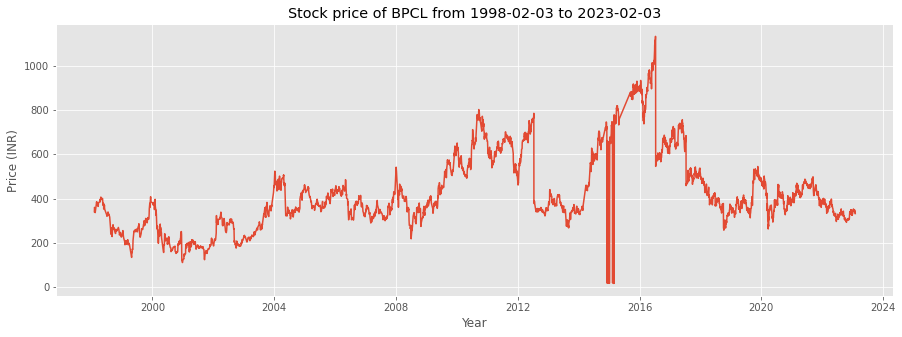

In [9]:
plt.style.use('ggplot')
plt.figure(figsize =[15,5] )
plt.plot(bpcl_df.index , bpcl_df['Close']  , linewidth = 1.5)
plt.xlabel('Year')
plt.ylabel('Price (INR)')
# plt.grid(visible = True)
plt.title(f'Stock price of BPCL from {START_DATE} to {CURRENT_DATE}')
plt.show()

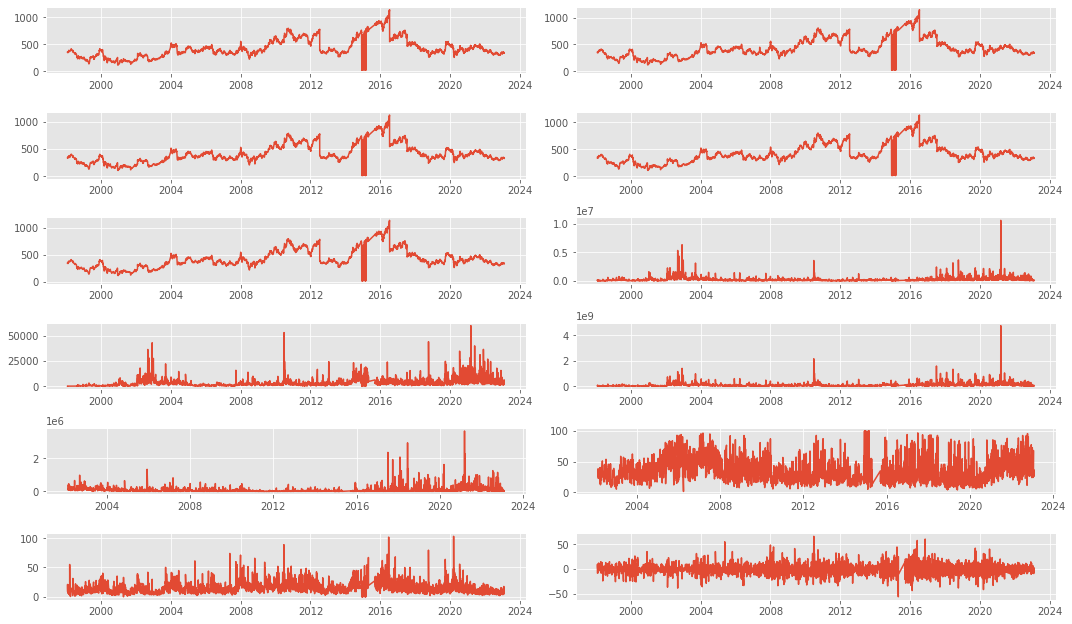

In [10]:
plt.figure(figsize = [15,10])
position = 1 
for column in bpcl_df.columns:
    plt.subplot(7,2, position)
    plt.plot(bpcl_df[column])
    position+=1 
    plt.tight_layout()
plt.show()
    

### <mark>Nothing conclusive could be said so let's try fetching transformed data </mark>

In [11]:
quandl.ApiConfig.api_key = API_KEY
df = quandl.get(BPCL_code, start_date= START_DATE, end_date=CURRENT_DATE, collapse = 'daily' , order = 'asc' , transform = 'diff')

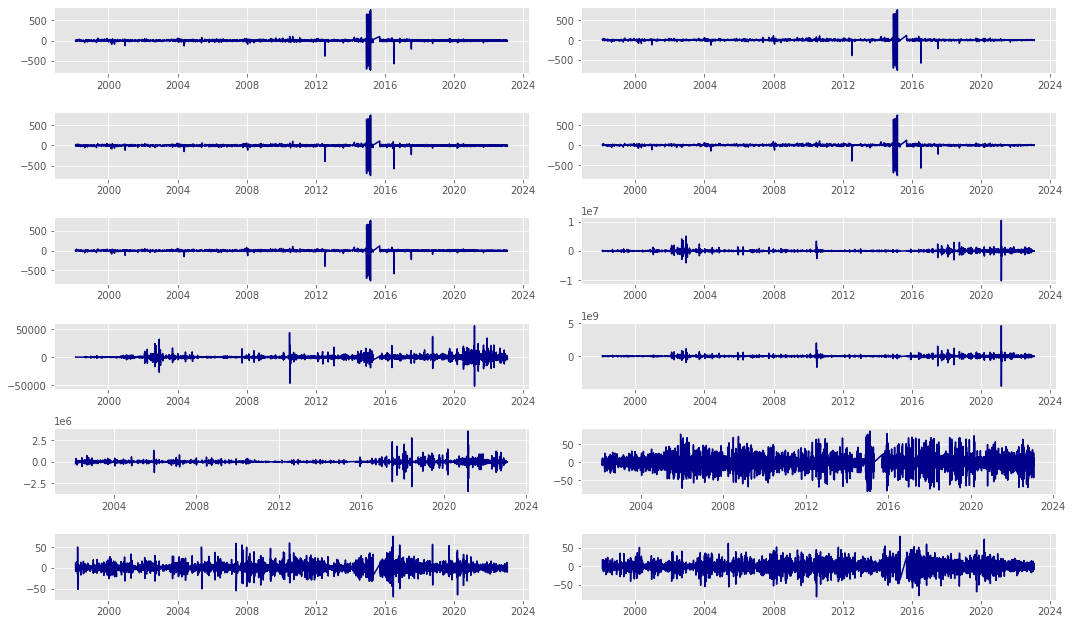

In [12]:
plt.figure(figsize = [15,10])
position = 1 
for column in df.columns:
    plt.subplot(7,2, position)
    plt.plot(df[column] , color = 'darkblue')
    position+=1 
    plt.tight_layout()
plt.show()

#### Apart from the recurrent spikes from 2014 to 2015 if we observe data carefully then we get 5 different spikes 
#### One in 2000, 2004 , 2012, 2016 , 2017 

## Task 2 
##### 2. `Programmitically detect` any splits and consolidations that have occurred.

In [13]:
newdf = bpcl_df.pct_change()

In [14]:
errors = newdf[abs(newdf['Close']) > 0.30]
clean_errors = errors
errors

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2000-12-18,-0.514403,-0.502049,-0.498922,-0.492399,-0.499331,0.272748,0.047649,-3.627740e-01,NaN,NaN,-0.562500,-1.354839
2004-05-18,-0.287257,-0.275424,-0.328462,-0.314064,-0.322514,0.441289,0.666586,-2.354708e-02,-0.203251,-0.447172,1.144118,-2.180451
2012-07-13,-0.498037,-0.501584,-0.504672,-0.507262,-0.503471,0.276081,-0.071390,-3.663884e-01,0.273139,-0.002308,-0.322097,-1.408805
2014-12-10,-0.976655,-0.976794,-0.976044,-0.976125,-0.976372,-0.999314,-0.999398,-9.999838e-01,-0.997678,2.382950,-1.000000,-1.000000
2014-12-11,38.616519,39.117994,37.849558,38.023599,38.293388,5249.820000,4278.000000,2.063210e+05,2660.180000,-0.493200,inf,-inf
2014-12-17,-0.973050,-0.973958,-0.973001,-0.973747,-0.973690,-0.999510,-0.999816,-9.999871e-01,-0.998052,2.977725,-1.000000,-1.000000
2014-12-22,36.514451,36.997110,36.289017,36.884393,37.286471,80315.000000,1517.500000,3.075027e+06,36921.000000,-0.540300,inf,inf
2014-12-23,-0.973498,-0.973834,-0.973337,-0.973756,-0.973712,-0.999888,-0.999341,-9.999971e-01,-0.999756,1.175332,-1.000000,-1.000000
2014-12-30,36.750000,37.229651,36.514535,36.779070,37.079486,7343.444444,1853.000000,2.796538e+05,1412.444444,-0.807500,inf,inf


In [15]:
# the most common stock split is 1/2 ,1/3 or 2/3 and it wouldn't be feasible if a company does more than 67% split 
# SO any thing beyond that should be excluded 
errors[abs(errors['Close']) < 0.67]

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2000-12-18,-0.514403,-0.502049,-0.498922,-0.492399,-0.499331,0.272748,0.047649,-0.362774,NaN,NaN,-0.562500,-1.354839
2004-05-18,-0.287257,-0.275424,-0.328462,-0.314064,-0.322514,0.441289,0.666586,-0.023547,-0.203251,-0.447172,1.144118,-2.180451
2012-07-13,-0.498037,-0.501584,-0.504672,-0.507262,-0.503471,0.276081,-0.071390,-0.366388,0.273139,-0.002308,-0.322097,-1.408805
2016-07-13,-0.506630,-0.509827,-0.512780,-0.513347,-0.512129,0.613536,-0.336958,-0.212797,1.074924,0.285880,-0.421896,-0.102151
2017-07-13,-0.311730,-0.316739,-0.330412,-0.330191,-0.328410,1.023680,0.325251,0.359079,0.527176,-0.245388,0.843750,-6.186047


Looking at the above data we can see that when the stock split occured the closing prices changed dramatically

But in the year 2004 there weren't any splits that occured so what could be the reason for this spike ??

here could be several reasons why the shift in the closing price of two different days may indicate a stock split, but no stock split was announced. Some possible reasons are:

Market volatility: Market conditions can cause fluctuations in the stock price, even if no major events such as a stock split have occurred.

Corporate news or announcements: Company-specific news, such as earnings reports or management changes, can also impact the stock price and cause large shifts.

Technical factors: Technical factors, such as trading volumes, can also impact the stock price and cause fluctuations.

Data error: There is always the possibility of data errors, such as typos or incorrect data inputs, that can result in incorrect stock price information.

It's important to consider multiple sources of information and not rely solely on a single dataset when analyzing stocks. It's also recommended to use multiple analytical methods to confirm the results and cross-reference with other sources to ensure accuracy.

#### Technical factors, such as trading volumes, can also impact the stock price and cause fluctuations.
Here we are having No of trades feature which shows that the shift in prices are definetely due to intra-day trading 
So we can re-filter the data that are no affected due to intraday trades

It can also occur due to incorrect entry but we can't verify it because of source limitations

In [16]:
errors  = errors[(abs(errors['Close']) < 0.67) & (abs(errors['No. of Trades'])<0.40)]
errors
# ie less than 40% of trades have taken place assuming that the majority shares are held by govt 

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2000-12-18,-0.514403,-0.502049,-0.498922,-0.492399,-0.499331,0.272748,0.047649,-0.362774,NaN,NaN,-0.562500,-1.354839
2012-07-13,-0.498037,-0.501584,-0.504672,-0.507262,-0.503471,0.276081,-0.071390,-0.366388,0.273139,-0.002308,-0.322097,-1.408805
2016-07-13,-0.506630,-0.509827,-0.512780,-0.513347,-0.512129,0.613536,-0.336958,-0.212797,1.074924,0.285880,-0.421896,-0.102151
2017-07-13,-0.311730,-0.316739,-0.330412,-0.330191,-0.328410,1.023680,0.325251,0.359079,0.527176,-0.245388,0.843750,-6.186047


In [17]:
# hence in order to get all entries where the split occured we can index them and create a new column 

## Task 3 
##### 3. Correct the stock prices for any `splits and consolidations` that have occurred.

In [18]:
bpcl_df['Splits/Consolidation'] = np.nan

In [19]:
cumulative_multiple = 1
for date in errors.index[::-1] :
#     bpcl_df[date , 'Splits/Consolidation'] = errors.loc[date,'WAP']
    cumulative_multiple *= (1-abs(errors.loc[str(date) , 'WAP']))
    bpcl_df.loc[str(date), 'Splits/Consolidation'] = cumulative_multiple
    print(cumulative_multiple)

0.6715902775746586
0.3276492609502214
0.16268746771908787
0.08145262358583408


In [20]:
bpcl_df['Splits/Consolidation']= bpcl_df['Splits/Consolidation'].bfill()

In [21]:
bpcl_df['Splits/Consolidation'].replace(np.nan , 1, inplace = True)


In [22]:
bpcl_df['AdjClose'] = bpcl_df['Close']*bpcl_df['Splits/Consolidation']

In [23]:
cumulative_multiple = 1
for date in errors.index[::-1] :
    
    bpcl_df.loc[str(date) , 'AdjClose']  = cumulative_multiple*bpcl_df.loc[str(date), 'Close']
    cumulative_multiple *= (1-abs(errors.loc[str(date) , 'WAP']))
    

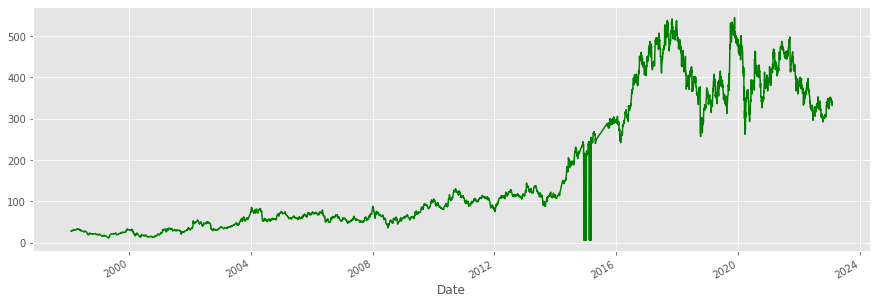

In [24]:
bpcl_df['AdjClose'].plot(figsize = [15,5] , color = 'Green')
# plt.axvline('2000-12-18')
plt.show()

In [25]:
incorrect_inputs = bpcl_df.loc[clean_errors[clean_errors.index.isin(errors.index) == False].index].pct_change().loc[:,['Close']]<0

In [26]:
incorrect_inputs = bpcl_df.loc[incorrect_inputs[incorrect_inputs['Close']== True].index]
incorrect_inputs

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Splits/Consolidation,AdjClose
Date,,,,,,,,,,,,,,
2014-12-10,16.95,16.95,16.95,16.95,16.94,50.0,2.0,847.0,50.0,100.0,0.0,0.0,0.327649,5.553655
2014-12-17,17.00,17.00,17.00,17.00,17.00,100.0,2.0,1700.0,100.0,100.0,0.0,0.0,0.327649,5.570037
2014-12-23,17.20,17.20,17.20,17.20,17.11,9.0,2.0,154.0,9.0,100.0,0.0,0.0,0.327649,5.635567
2015-01-05,16.70,16.70,16.70,16.70,16.70,193.0,3.0,3223.0,193.0,100.0,0.0,0.0,0.327649,5.471743
2015-02-12,18.35,18.35,18.35,18.35,18.00,2.0,2.0,36.0,2.0,100.0,0.0,0.0,0.327649,6.012364
2015-02-23,18.00,18.00,18.00,18.00,18.00,1105.0,6.0,19890.0,1105.0,100.0,0.0,0.0,0.327649,5.897687
2015-03-03,16.55,16.55,16.55,16.55,16.55,195.0,5.0,3227.0,195.0,100.0,0.0,0.0,0.327649,5.422595


In [27]:
bpcl_df.drop(index = incorrect_inputs.index , inplace = True)

<AxesSubplot: xlabel='Date'>

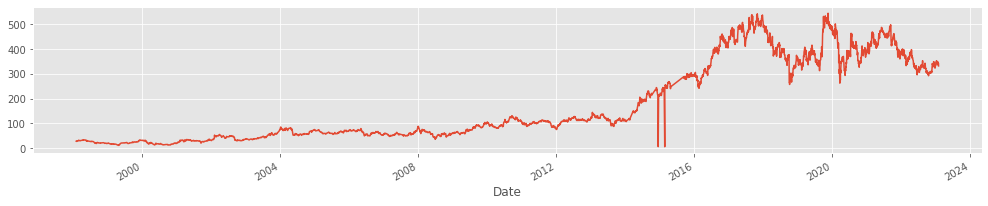

In [28]:
bpcl_df['AdjClose'].plot(kind='line' , figsize = [17,3])

In [29]:
while len(incorrect_inputs)>0:
    newdf = bpcl_df.pct_change()
    errors = newdf[abs(newdf['Close']) > 0.30]
    clean_errors = errors
    errors  = errors[(abs(errors['Close']) < 0.67) & (abs(errors['No. of Trades'])<0.40)]
    incorrect_inputs = bpcl_df.loc[clean_errors[clean_errors.index.isin(errors.index) == False].index].pct_change().loc[:,['Close']]<0
    incorrect_inputs = bpcl_df.loc[incorrect_inputs[incorrect_inputs['Close']== True].index]
    bpcl_df.drop(index = incorrect_inputs.index , inplace = True)

In [30]:
def annotation(index):
    plt.annotate('Split', (mdates.date2num(errors.index[index]), bpcl_df.loc[errors.index,'AdjClose'][index]), xytext=(18, 10), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

## Task 4
##### 4. Display the final adjusted stock prices.

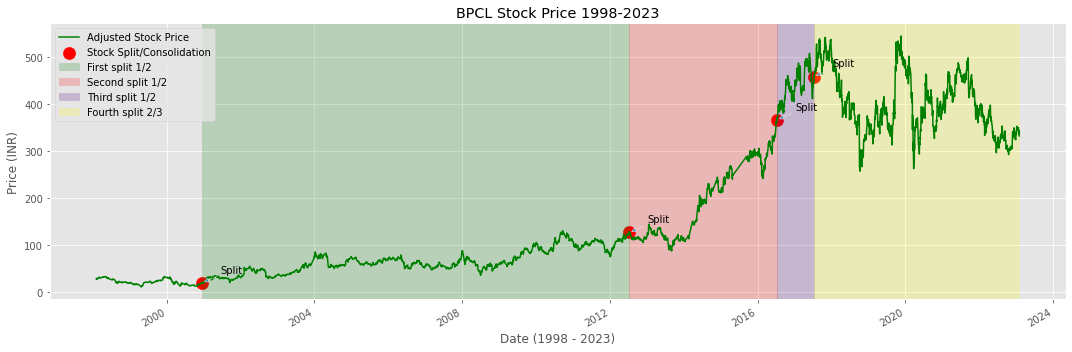

In [31]:

bpcl_df['AdjClose'].plot(kind='line' , figsize = [15,5] , color = 'Green' , label= 'Adjusted Stock Price')
# for date in errors.index:
#     plt.axvline(date , color = 'Green')
plt.scatter(x=errors.index , y= bpcl_df.loc[errors.index,'AdjClose'] , s = 150 , c = 'Red' , label = 'Stock Split/Consolidation')


plt.title('BPCL Stock Price 1998-2023')
plt.xlabel('Date (1998 - 2023)')
plt.ylabel('Price (INR)')
plt.axvspan(errors.index[0], errors.index[1], alpha=0.2, color="green" , label = 'First split 1/2')
plt.axvspan(errors.index[1], errors.index[2], alpha=0.2, color="red" , label = 'Second split 1/2')
plt.axvspan(errors.index[2], errors.index[3], alpha=0.2, color="indigo" , label = 'Third split 1/2')
plt.axvspan(errors.index[3], datetime.now(), alpha=0.2, color="yellow" , label = 'Fourth split 2/3')
for index in range(len(errors)):
    annotation(index)
plt.legend()
plt.tight_layout()
plt.show()

## Task 5 
5. Show the dates for any splits and consolidations that have occurred.

####  Dates for which splits / consolidation occured 
##### ['2000-12-18',         '2012-07-13',          '2016-07-13',           '2017-07-13']

In [32]:
errors.index

DatetimeIndex(['2000-12-18', '2012-07-13', '2016-07-13', '2017-07-13'], dtype='datetime64[ns]', name='Date', freq=None)

## Project Summary 
The code imports the necessary libraries such as Quandl, Pandas, Matplotlib, and Seaborn. It also sets the maximum number of rows to display in the output to None. The API key for Quandl is stored in the variable "API_KEY".

The stock code for Bharat Petroleum Corporation Limited (BPCL) is stored in the variable "BPCL_code". The current date and the start date (25 years prior to the current date) are calculated using the datetime library and stored as "CURRENT_DATE" and "START_DATE", respectively. The stock data for BPCL is then fetched from Quandl using the start and end dates and stored in the data frame "bpcl_df".

The code then plots a line graph to show the stock price of BPCL over time and also plots subplots for each column in the data frame to show the trends in each feature.

In the next section, the code fetches the difference in the stock price data and plots subplots to show the trends in each feature. The code also calculates the percentage change in the "Close" feature and identifies errors where the absolute value of the change exceeds `0.30`. The code then removes any errors where the absolute change exceeds `0.67`, as it could'nt indicate a stock split, which is not feasible.

The code finally concludes that the spike in the stock price in 2004 could be due to several factors such as market volatility, corporate news or announcements, technical factors, or data errors. It is important to consider multiple sources of information and not rely solely on a single dataset when analyzing stocks.

### Note : 
___In the above notebook there were multiple noisy features from <font color=red>2014 to 2015</font> and given the quick succession of 
changes that occured in the short of time it is assumed that these were errors and not real market changes 
If these fluctuations are meant to a part of consolidations and splits then `revert back` so that the changes could be made___

In [33]:
pip freeze --local > requirements.txt

Note: you may need to restart the kernel to use updated packages.
